In [1]:
from sklearn.datasets import load_digits
from sklearn.model_selection import cross_val_score
import numpy as np
import matplotlib.pyplot as plt

## Dataset Preparation

In [2]:
# Load the sklearn MNIST Dataset
digits = load_digits()

In [3]:
X = digits.data # data gives the x values
Y = digits.target # target gives the y values

In [4]:
print(X.shape) # Each image has 64 features and there are 1797 examples
# This shows that each image is 8x8 image

(1797, 64)


In [5]:
print(Y.shape)

(1797,)


## Visualization

0


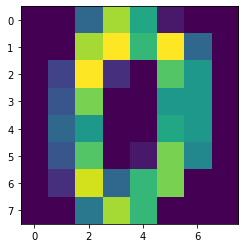

In [6]:
plt.imshow(X[0].reshape((8,8)))
print(Y[0])
plt.show()

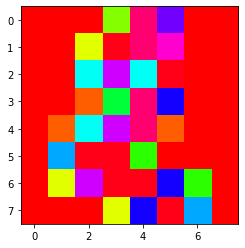

2


In [7]:
plt.imshow(X[2].reshape(8,8),cmap='hsv')
plt.show()
print(Y[2])

1


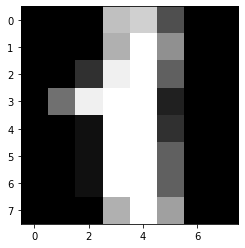

In [8]:
plt.imshow(X[1].reshape((8,8)), cmap='gray')
print(Y[1])
plt.show()

In [9]:
print(X[0]) # Grayscale image has 1 channel from 0 to 15
# RGB Image has 3 channels from 0 to 255

[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
 15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
  0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
  0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]


In [10]:
# SO, it would be good to apply Multinomial Naive Bayes as compared to Gaussian Naive Bayes as the values are not continuous.

## Train Models

In [11]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB

In [12]:
mnb = MultinomialNB()
gnb = GaussianNB()

## Training

In [13]:
mnb.fit(X,Y)
gnb.fit(X,Y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [14]:
mnb.score(X,Y)

0.9053978853644964

In [15]:
gnb.score(X,Y)

0.8580968280467446

In [16]:
# SO, Multinomial Naive Bayes as we expected is giving a higher accuracy than Gaussian Naive Bayes

In [17]:
# This is because mnb assumes the features are discrete whereas gnb assumes them to be continuous and modeled by a Gaussian Distribution.

In [18]:
cross_val_score(gnb,X,Y,scoring="accuracy",cv=10)

array([0.76756757, 0.81967213, 0.89502762, 0.71111111, 0.72625698,
       0.84357542, 0.8547486 , 0.86516854, 0.8079096 , 0.8125    ])

In [19]:
cross_val_score(gnb,X,Y,scoring="accuracy",cv=10).mean()

0.8103537583567821

In [20]:
# Average accuracy is around 81% for Gaussian Naive Bayes

In [21]:
cross_val_score(mnb,X,Y,scoring="accuracy",cv=10).mean()

0.8819396216300838

In [22]:
# Average accuracy is around 88% for Multinomial Naive Bayes

### This is because each feature is discrete valued! Hence, MNB gives better results!

## Constructing Confusion Matrix

In [29]:
from sklearn.metrics import confusion_matrix

classes_labels = np.arange(10)
print(classes_labels)

[0 1 2 3 4 5 6 7 8 9]


In [30]:
Y_mnb = mnb.predict(X)
cnf_matrix = confusion_matrix(Y,Y_mnb)
print(cnf_matrix)

[[175   0   0   0   3   0   0   0   0   0]
 [  0 137  14   0   0   1   2   0  13  15]
 [  0   7 160   0   0   0   0   0   8   2]
 [  0   0   2 159   0   2   0   5   8   7]
 [  1   0   0   0 173   0   0   4   3   0]
 [  0   0   0   0   1 157   1   1   2  20]
 [  0   2   0   0   1   1 176   0   1   0]
 [  0   0   0   0   0   0   0 178   1   0]
 [  0  11   1   0   1   0   1   1 154   5]
 [  0   1   0   1   1   1   0  11   7 158]]


In [31]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

Confusion matrix, without normalization
[[175   0   0   0   3   0   0   0   0   0]
 [  0 137  14   0   0   1   2   0  13  15]
 [  0   7 160   0   0   0   0   0   8   2]
 [  0   0   2 159   0   2   0   5   8   7]
 [  1   0   0   0 173   0   0   4   3   0]
 [  0   0   0   0   1 157   1   1   2  20]
 [  0   2   0   0   1   1 176   0   1   0]
 [  0   0   0   0   0   0   0 178   1   0]
 [  0  11   1   0   1   0   1   1 154   5]
 [  0   1   0   1   1   1   0  11   7 158]]


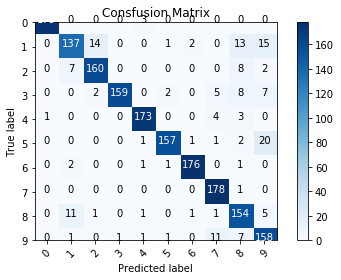

In [33]:
plot_confusion_matrix(cnf_matrix, classes=classes_labels,normalize=False,title="Consfusion Matrix",cmap=plt.cm.Blues)

Confusion matrix, without normalization
[[175   0   0   0   3   0   0   0   0   0]
 [  0 137  14   0   0   1   2   0  13  15]
 [  0   7 160   0   0   0   0   0   8   2]
 [  0   0   2 159   0   2   0   5   8   7]
 [  1   0   0   0 173   0   0   4   3   0]
 [  0   0   0   0   1 157   1   1   2  20]
 [  0   2   0   0   1   1 176   0   1   0]
 [  0   0   0   0   0   0   0 178   1   0]
 [  0  11   1   0   1   0   1   1 154   5]
 [  0   1   0   1   1   1   0  11   7 158]]


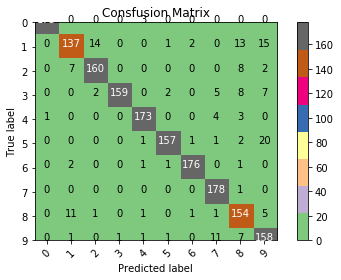

In [34]:
plot_confusion_matrix(cnf_matrix, classes=classes_labels,normalize=False,title="Consfusion Matrix",cmap=plt.cm.Accent)

## Confusion Matrix for GNB

In [35]:
Y_gnb = gnb.predict(X)
cnf_matrix = confusion_matrix(Y,Y_gnb)
print(cnf_matrix)

[[176   0   0   0   1   0   0   1   0   0]
 [  0 154   0   0   0   0   3   5  14   6]
 [  0  13 113   0   0   1   1   0  49   0]
 [  0   2   2 145   0   6   0   7  20   1]
 [  1   1   0   0 152   1   2  21   3   0]
 [  0   0   0   3   0 169   1   6   2   1]
 [  0   1   0   0   0   1 179   0   0   0]
 [  0   0   0   0   1   1   0 177   0   0]
 [  0   8   0   1   0   3   0  12 150   0]
 [  1   6   0   5   1   3   0  17  20 127]]


Confusion matrix, without normalization
[[176   0   0   0   1   0   0   1   0   0]
 [  0 154   0   0   0   0   3   5  14   6]
 [  0  13 113   0   0   1   1   0  49   0]
 [  0   2   2 145   0   6   0   7  20   1]
 [  1   1   0   0 152   1   2  21   3   0]
 [  0   0   0   3   0 169   1   6   2   1]
 [  0   1   0   0   0   1 179   0   0   0]
 [  0   0   0   0   1   1   0 177   0   0]
 [  0   8   0   1   0   3   0  12 150   0]
 [  1   6   0   5   1   3   0  17  20 127]]


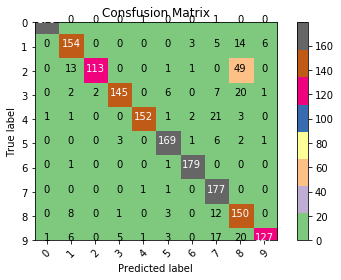

In [36]:
plot_confusion_matrix(cnf_matrix, classes=classes_labels,normalize=False,title="Consfusion Matrix",cmap=plt.cm.Accent)

### Hence, MNB gives better results.